Dynamic Policy Cost (Path A): 1.141087047866959
Dynamic Policy Cost (Path B): 0.6931471805599453
Static Policy Cost (Path A): 0.6931471805599453
Static Policy Cost (Path B): 0.5623351446188083


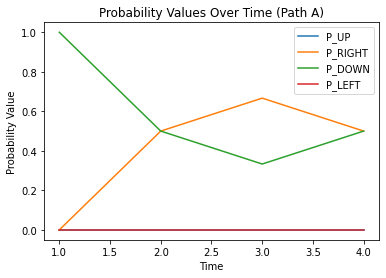

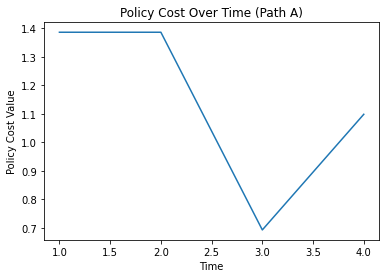

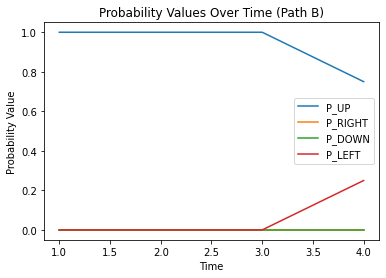

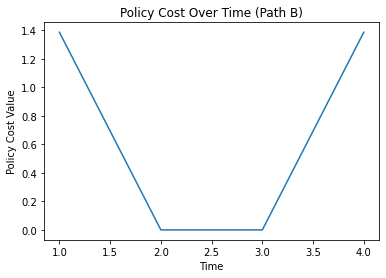

In [20]:
import numpy as np
import math
import matplotlib.pyplot as plt

ACTIONS = ["up", "right", "down", "left"] #final matrix for my reference to show the different actions
TOTAL_TIME = [1, 2, 3, 4]

def a_policy_cost():
    A_ACTIONS = [2]*len(TOTAL_TIME)
    A_ACTIONS[1] = A_ACTIONS[2] = 1
    
    P_UP = []
    P_RIGHT = []
    P_DOWN = []
    P_LEFT = []
    POLICY_COST = []
    
    ACTION_COUNT = [0, 0, 0, 0]
    ACTION_PROB = [0, 0, 0, 0]
    SUM = 0
    
    for i in A_ACTIONS:
        ACTION_COUNT[i] += 1; SUM += 1
        ACTION_PROB = np.true_divide(ACTION_COUNT, SUM)
        if i == 0:
            if not P_UP or P_UP[-1] == 0.0: POLICY_COST.append(math.log(1/0.25))
            else: POLICY_COST.append(math.log(1/P_UP[-1]))
        elif i == 1:
            if not P_RIGHT or P_RIGHT[-1] == 0.0: POLICY_COST.append(math.log(1/0.25))
            else: POLICY_COST.append(math.log(1/P_RIGHT[-1]))
        elif i == 2:
            if not P_DOWN or P_DOWN[-1] == 0.0: POLICY_COST.append(math.log(1/0.25))
            else: POLICY_COST.append(math.log(1/P_DOWN[-1]))
        else:
            if not P_LEFT or P_LEFT[-1] == 0.0: POLICY_COST.append(math.log(1/0.25))
            else: POLICY_COST.append(math.log(1/P_LEFT[-1]))
            
        P_UP.append(ACTION_PROB[0]); P_RIGHT.append(ACTION_PROB[1])
        P_DOWN.append(ACTION_PROB[2]); P_LEFT.append(ACTION_PROB[3])
        
    return P_UP, P_RIGHT, P_DOWN, P_LEFT, POLICY_COST, ACTION_PROB, A_ACTIONS

def b_policy_cost():
    B_ACTIONS = [0]*len(TOTAL_TIME)
    B_ACTIONS[3] = 3
    
    P_UP = []
    P_RIGHT = []
    P_DOWN = []
    P_LEFT = []
    POLICY_COST = []
    
    ACTION_COUNT = [0, 0, 0, 0]
    ACTION_PROB = [0, 0, 0, 0]
    SUM = 0
    
    for i in B_ACTIONS:
        ACTION_COUNT[i] += 1; SUM += 1
        ACTION_PROB = np.true_divide(ACTION_COUNT, SUM)
        if i == 0:
            if not P_UP or P_UP[-1] == 0.0: POLICY_COST.append(math.log(1/0.25))
            else: POLICY_COST.append(math.log(1/P_UP[-1]))
        elif i == 1:
            if not P_RIGHT or P_RIGHT[-1] == 0.0: POLICY_COST.append(math.log(1/0.25))
            else: POLICY_COST.append(math.log(1/P_RIGHT[-1]))
        elif i == 2:
            if not P_DOWN or P_DOWN[-1] == 0.0: POLICY_COST.append(math.log(1/0.25))
            else: POLICY_COST.append(math.log(1/P_DOWN[-1]))
        else:
            if not P_LEFT or P_LEFT[-1] == 0.0: POLICY_COST.append(math.log(1/0.25))
            else: POLICY_COST.append(math.log(1/P_LEFT[-1]))
            
        P_UP.append(ACTION_PROB[0]); P_RIGHT.append(ACTION_PROB[1])
        P_DOWN.append(ACTION_PROB[2]); P_LEFT.append(ACTION_PROB[3])
    
    return P_UP, P_RIGHT, P_DOWN, P_LEFT, POLICY_COST, ACTION_PROB, B_ACTIONS

if __name__ == "__main__":
    p_up_a, p_right_a, p_down_a, p_left_a, policy_cost_a, action_prob_a, a_actions = a_policy_cost()
    p_up_b, p_right_b, p_down_b, p_left_b, policy_cost_b, action_prob_b, b_actions = b_policy_cost()
    
    print('Dynamic Policy Cost (Path A):', sum(policy_cost_a)/len(TOTAL_TIME))
    print('Dynamic Policy Cost (Path B):', sum(policy_cost_b)/len(TOTAL_TIME))
    
    static_policy_a = 0
    for i in a_actions:
        if action_prob_a[i] != 0: static_policy_a += math.log(1/action_prob_a[i])
    static_policy_a /= len(TOTAL_TIME)
            
    static_policy_b = 0
    for i in b_actions:
        if action_prob_b[i] != 0: static_policy_b += math.log(1/action_prob_b[i])
    static_policy_b /= len(TOTAL_TIME)
    
    print('Static Policy Cost (Path A):', static_policy_a)
    print('Static Policy Cost (Path B):', static_policy_b)

    fig1, ax1 = plt.subplots()
    for i in range(len(ACTIONS)):
        if i == 0: ax1.plot(TOTAL_TIME, p_up_a, label="P_UP")
        elif i == 1: ax1.plot(TOTAL_TIME, p_right_a, label="P_RIGHT")
        elif i == 2: ax1.plot(TOTAL_TIME, p_down_a, label="P_DOWN")
        else: ax1.plot(TOTAL_TIME, p_left_a, label="P_LEFT")
    ax1.legend(loc="best")
    ax1.set(xlabel="Time", ylabel="Probability Value", title="Probability Values Over Time (Path A)")

    fig2, ax2 = plt.subplots()
    ax2.plot(TOTAL_TIME, policy_cost_a)
    ax2.set(title="Policy Cost Over Time (Path A)", ylabel="Policy Cost Value", xlabel="Time")
    
    fig3, ax3 = plt.subplots()
    for i in range(len(ACTIONS)):
        if i == 0: ax3.plot(TOTAL_TIME, p_up_b, label="P_UP")
        elif i == 1: ax3.plot(TOTAL_TIME, p_right_b, label="P_RIGHT")
        elif i == 2: ax3.plot(TOTAL_TIME, p_down_b, label="P_DOWN")
        else: ax3.plot(TOTAL_TIME, p_left_b, label="P_LEFT")
    ax3.legend(loc="best")
    ax3.set(xlabel="Time", ylabel="Probability Value", title="Probability Values Over Time (Path B)")

    fig4, ax4 = plt.subplots()
    ax4.plot(TOTAL_TIME, policy_cost_b)
    ax4.set(title="Policy Cost Over Time (Path B)", ylabel="Policy Cost Value", xlabel="Time")